In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [150]:
def double_exponential_smooth(d, extra_periods = 1, alpha = 0.4, beta = 0.4):
    #length of input list
    cols = len(d) 
   
    for i in range(extra_periods):
        d.append(np.nan)

    #fill forecast, level, and trend columns with nan
    f = np.array([np.nan]*(cols+extra_periods))
    a = np.array([np.nan]*(cols+extra_periods))
    b = np.array([np.nan]*(cols+extra_periods))

    #initialize level and trend columns
    a[0] = d[0]
    b[0] = d[1]-d[0]
    
    #populate level and trend columns
    for i in range(1,cols):
        a[i] = alpha * d[i] + (1-alpha)*(a[i-1] + b[i-1])
        b[i] = beta * (a[i] - a[i-1]) + (1-beta)*b[i-1]

    #forecast next to historical data
    for i in range(1,cols+1):
        f[i] = a[i-1] + b[i-1]

    #forecast into the future
    for i in range(cols+1, extra_periods + cols):
        f[i] = f[i-1] + b[cols-1]



    df = pd.DataFrame.from_dict({'Demand':d, 'Forecast':f, 'Level':a, 'Trend':b})
    df['Error'] = df['Demand'] - df['Forecast']
    return(df)
    
    

In [144]:
def kpi(df):
    #average demand
    dem_ave = df.loc[df['Error'].notnull(), 'Demand'].mean()
    #absolute bias
    bias_abs = df['Error'].mean()
    #relative bias
    bias_rel = bias_abs / dem_ave
    #print results 
    print('Bias: {:0.2f}, {:.2%}'.format(bias_abs, bias_rel))

    #calculate MAPE
    MAPE = (df['Error'].abs() / df['Demand']).mean()
    #print results
    print('MAPE: {:0.2%}'.format(MAPE))

    #calculate absoltue and scaled MAE
    MAE_abs = df['Error'].abs().mean()
    MAE_rel = MAE_abs / dem_ave
    #print results
    print('MAE: {:0.2f}, {:0.2%}'.format(MAE_abs,MAE_rel))

    #calculate absolute and scaled RSME
    RMSE_abs = np.sqrt((df['Error']**2).mean())
    RMSE_rel =  RMSE_abs / dem_ave
    #print results
    print('RMSE: {:0.2f}, {:0.2%}'.format(RMSE_abs,RMSE_rel))

In [148]:
d = [28,19,18,13,19,16,19,18,13,16,16,11,18,15,13,15,13,11,13,10,12]
table = double_exponential_smooth(d,4,alpha=0.4,beta=0.4)
table

,Demand,Forecast,Level,Trend,Error
0,28.0,NaN,28.000000,-9.000000,NaN
1,19.0,19.000000,19.000000,-9.000000,0.000000
2,18.0,10.000000,13.200000,-7.720000,-8.000000
3,13.0,5.480000,8.488000,-6.516800,-7.520000
4,19.0,1.971200,8.782720,-3.792192,-17.028800
5,16.0,4.990528,9.394317,-2.030676,-11.009472
6,19.0,7.363640,12.018184,-0.168859,-11.636360
7,18.0,11.849325,14.309595,0.815249,-6.150675
8,13.0,15.124844,14.274907,0.475274,2.124844
9,16.0,14.750180,15.250108,0.675245,-1.249820


In [151]:
kpi(table)

Bias: -2.64, -17.71%
MAPE: 28.14%
MAE: 4.38, 29.40%
RMSE: 6.26, 42.02%


In [152]:
table.index.name = 'Period'

<AxesSubplot:title={'center':'Double Exponential Smoothing'}, xlabel='Period'>

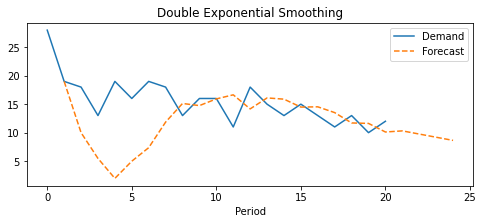

In [155]:
table[['Demand', 'Forecast']].plot(figsize = (8,3), title = 'Double Exponential Smoothing', style = ['-','--'])